In [3]:
import datacube
from datacube.storage.masking import mask_invalid_data
dc = datacube.Datacube()

In [4]:
def getRegion(l) :
#nwt   1         # burn before and after 
#vi    2         # coastal area
#hvm   3         # copper mine
#fmm   4         # oil sands
#pet   5         # research forest
#glc   6         # athabasca glaciers
    if l == 1 :
        lat = (62.3768, 63.3062)
        lon = (-114.7038, -112.3989)
    elif l == 2 :
        lat = (48.2971, 49.4273)
        lon = (-123.7845, -121.9313)
    elif l == 3 :
        lat = (49.7178, 50.8349)
        lon = (-121.6712, -119.7794)
    elif l == 4 :
        lat = (56.7849, 57.8174)
        lon = (-112.1411, -110.0301)
    elif l == 6 :
        lat = (51.1364, 52.2393)
        lon = (-117.9841, -116.0518)
    else :
        lat = (45.4499, 46.6034)
        lon = (-78.4944, -76.7130)
    return (lat, lon)

In [5]:
def getBands(p) :    
    prd = p[:4]
    
    if prd == 'LE07' :
        bands = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'quality']    
    elif prd == 'LM05' :
        bands = ['green', 'red', 'nir1', 'nir2', 'quality']    
    elif prd == 'LT05' :    
        bands = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'quality']    
    elif prd == 'LM03' :
        bands = ['green', 'red', 'nir1', 'nir2', 'quality']        
    elif prd == 'LC08' : 
        bands = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'cirrus', 'lwir1', 'lwir2', 'quality']
    return bands

In [6]:
# Prepare the DB query
def buildQuery(p, r, g, b, t1, t2, l) :    

    lat, lon = getRegion(l)

    bands = getBands(p)
    
    query = { 
        'product' : p
        , 'latitude' : lat
        , 'longitude' : lon
        , 'measurements' : [ bands[r], bands[g], bands[b] ]
        , 'resolution' : (-0.0025, 0.0025)
    }

    if (t1 != '') and (t2 != '') :
        query['time'] = (t1, t2)
    
    return query

In [7]:
# Using the dataset, make an rgb plot
def plotRGB(data) :

    fake_saturation = 40000

    # Sets all `nodata` values to ``nan``.
    data = mask_invalid_data(data)

    # Isolate the color dimension in an xarray.DataArray, use transpose to make color the last dimension
    rgb = (data.to_array(dim='color'))
    rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1])) 

    # Filter out pixels where any band is 'saturated'
    rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))

    # Scale to [0, 1] range for imshow
    rgb /= fake_saturation
    return rgb

In [8]:
# Select a product
product = 'LC08_scene'

# Select band combination
red = 3
green = 5
blue = 7

red, green, blue = map(lambda x: x - 1,[red, green, blue])

# Select a prepared region
#nwt   1         # burn before and after  46/16
#vi    2         # coastal area           47/26
#hvm   3         # copper mine            46/25
#fmm   4         # oil sands              42/20
#pet   5         # research forest        17/28
#glc   6         # athabasca glaciers     44/24

region = 4

# Select time start and end
start = ''
end = ''

In [18]:
#query = buildQuery(product, red, green, blue, start, end, region)
data = dc.load( "LC08_caea_30m_2", time = ('2015-07', '2015-08'), measurements = ['red', 'green', 'blue'])
rgb = plotRGB(data)

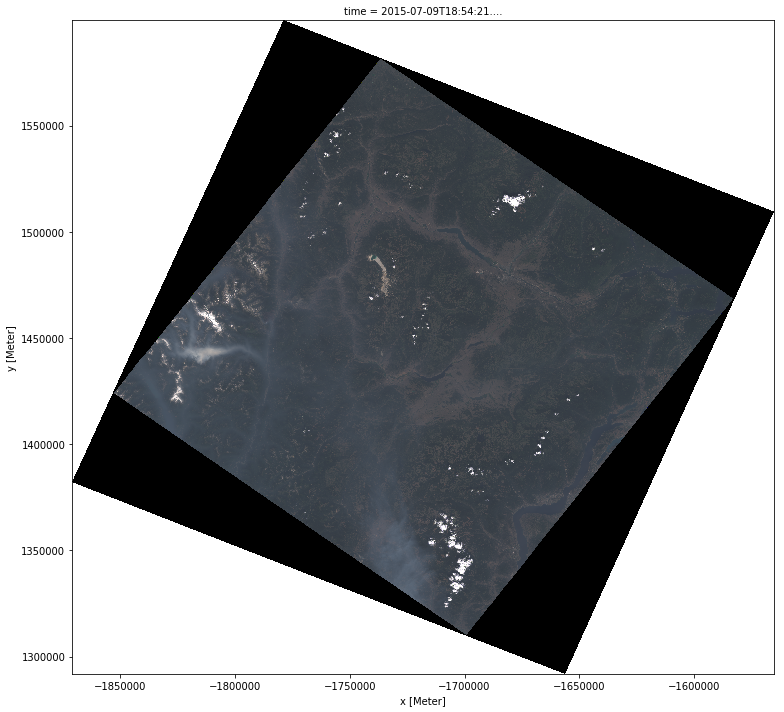

In [19]:
rgb.plot.imshow( x = data.crs.dimensions[1], y = data.crs.dimensions[0], col = 'time', col_wrap = 1 , size = 10, add_colorbar = False)

In [11]:
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 10190, y: 10254)
Coordinates:
  * time     (time) datetime64[ns] 2015-07-09T18:54:21.313685
  * y        (y) float64 1.292e+06 1.292e+06 1.292e+06 1.292e+06 1.292e+06 ...
  * x        (x) float64 -1.565e+06 -1.565e+06 -1.565e+06 -1.565e+06 ...
Data variables:
    red      (time, y, x) int16 32767 32767 32767 32767 32767 32767 32767 ...
    green    (time, y, x) int16 32767 32767 32767 32767 32767 32767 32767 ...
    blue     (time, y, x) int16 32767 32767 32767 32767 32767 32767 32767 ...
Attributes:
    crs:      EPSG:102001

In [21]:
meas = dc.list_measurements()

In [22]:
meas

aliases  dtype  \
product         measurement                                         
LC08_caea       coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                panchromatic        [band_8, panchromatic]  int16   
                cirrus                    [band_9, cirrus]  int16   
                lwir1                     [band_10, lwir1]  int16   
                lwir2                     [band_11, lwir2]  int16   
                quality                 [QUALITY, quality]  int16   
LC08_caea_30m   coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                panchromatic        [band_8, panchromatic]  int16   
                cirrus                    [band_9, cirrus]  int16   
                lwir1                     [band_10, lwir1]  int16   
                lwir2                     [band_11, lwir2]  int16   
                quality                 [QUALITY, quality]  int16   
LC08_caea_30m_1 coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
...                                                    ...    ...   
LM03_caea_30m   quality                 [QUALITY, quality]  int16   
LM03_scene      green                      [band_4, green]  int16   
                red                          [band_5, red]  int16   
                nir1                        [band_6, nir1]  int16   
                nir2                        [band_7, nir2]  int16   
                quality                 [QUALITY, quality]  int16   
LM05_caea       green                      [band_1, green]  int16   
                red                          [band_2, red]  int16   
                nir1                        [band_3, nir1]  int16   
                nir2                        [band_4, nir2]  int16   
                quality                 [QUALITY, quality]  int16   
LM05_scene      green                      [band_1, green]  int16   
                red                          [band_2, red]  int16   
                nir1                        [band_3, nir1]  int16   
                nir2                        [band_4, nir2]  int16   
                quality                 [QUALITY, quality]  int16   
LT05_caea       blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                nir                          [band_4, red]  int16   
                red                          [band_3, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                quality                 [QUALITY, quality]  int16   
LT05_scene      blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                nir                          [ban

In [23]:
type(meas)

pandas.core.frame.DataFrame

In [44]:
type(meas.loc['LC08_scene'])

pandas.core.frame.DataFrame

In [45]:
meas.loc['LC08_scene'].label

AttributeError: 'DataFrame' object has no attribute 'label'